# Classification Models on IRIS dataset

Loading Important Libraries

In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Reading dataset

In [372]:

# Use pd.read_excel for Excel files
iris_df = pd.read_excel('/content/iris (1).xls')


Basic Information from the dataset

In [373]:
iris_df.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [374]:
iris_df.tail(10)

,SL,SW,PL,PW,Classification
140,6.7,3.1,5.6,2.4,Iris-virginica
141,NaN,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [375]:
iris_df.shape

(150, 5)

In [376]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [377]:
iris_df.describe()



,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Checking Missing Values


In [378]:
iris_df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

here the columns SL,SW and PL consist of null values

In [379]:
iris_df['SL']=iris_df['SL'].fillna(iris_df['SL'].mean())
iris_df['SW']=iris_df['SW'].fillna(iris_df['SW'].mean())
iris_df['PL']=iris_df['PL'].fillna(iris_df['PL'].mean())

In [380]:
iris_df.head(10)


,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa
5,5.400000,3.9,1.7,0.4,Iris-setosa
6,4.600000,3.4,1.4,0.3,Iris-setosa
7,5.000000,3.4,1.5,0.2,Iris-setosa
8,4.400000,2.9,1.4,0.2,Iris-setosa
9,4.900000,3.1,1.5,0.1,Iris-setosa


In [381]:
iris_df.tail(10)

,SL,SW,PL,PW,Classification
140,6.700000,3.1,5.60000,2.4,Iris-virginica
141,5.855944,3.1,5.10000,2.3,Iris-virginica
142,5.800000,2.7,5.10000,1.9,Iris-virginica
143,6.800000,3.2,5.90000,2.3,Iris-virginica
144,6.700000,3.3,5.70000,2.5,Iris-virginica
145,6.700000,3.0,5.20000,2.3,Iris-virginica
146,6.300000,2.5,5.00000,1.9,Iris-virginica
147,6.500000,3.0,3.75625,2.0,Iris-virginica
148,6.200000,3.4,5.40000,2.3,Iris-virginica
149,5.900000,3.0,5.10000,1.8,Iris-virginica


In [382]:
iris_df[['SL', 'PL']] = iris_df[['SL', 'PL']].round(1)



In [383]:
iris_df.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.9,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [384]:
iris_df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Checking Dataset is balanced or not

In [385]:
iris_df.value_counts('Classification')

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [386]:
iris_df.drop_duplicates(subset='Classification')

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


In [387]:
iris_df.shape


(150, 5)

# DATA VISULAIZATIONS

Relationship between flowers using countplot

<Axes: xlabel='Classification', ylabel='count'>

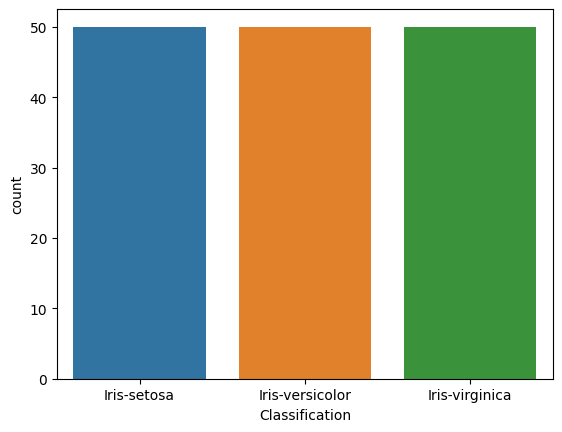

In [388]:
sns.countplot(x='Classification',data=iris_df)

Relation Between Features

1.SL and SW

<Axes: xlabel='SL', ylabel='SW'>

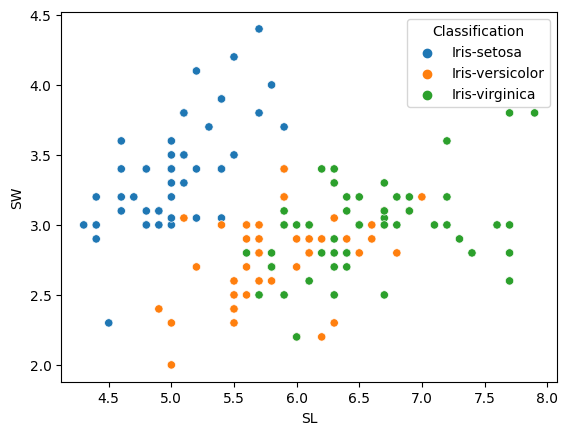

In [389]:
sns.scatterplot(x='SL', y='SW',
                hue='Classification', data=iris_df, )

Setosa has smaller sepal lengths but larger sepal widths.
Versicolor is positioned halfway between the other two species.
Virginica has larger sepal lengths but smaller sepal widths.

2.PL and PW



<Axes: xlabel='PL', ylabel='PW'>

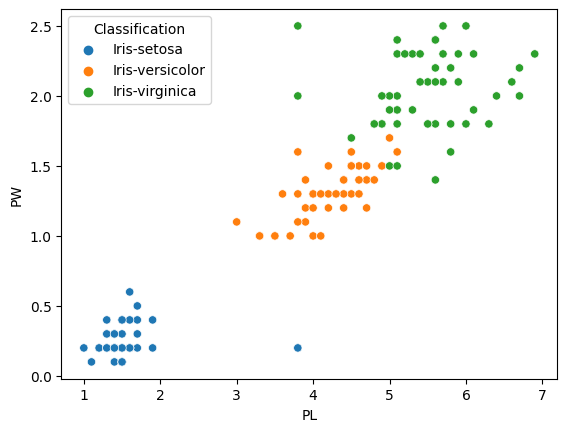

In [390]:
sns.scatterplot(x='PL', y='PW',
                hue='Classification', data=iris_df, )

Setosa smaller Petal length and width
Virginica larger Petal length and width
Versicolour positined halfway

Histogram for identifying distribution of data in each columns/features

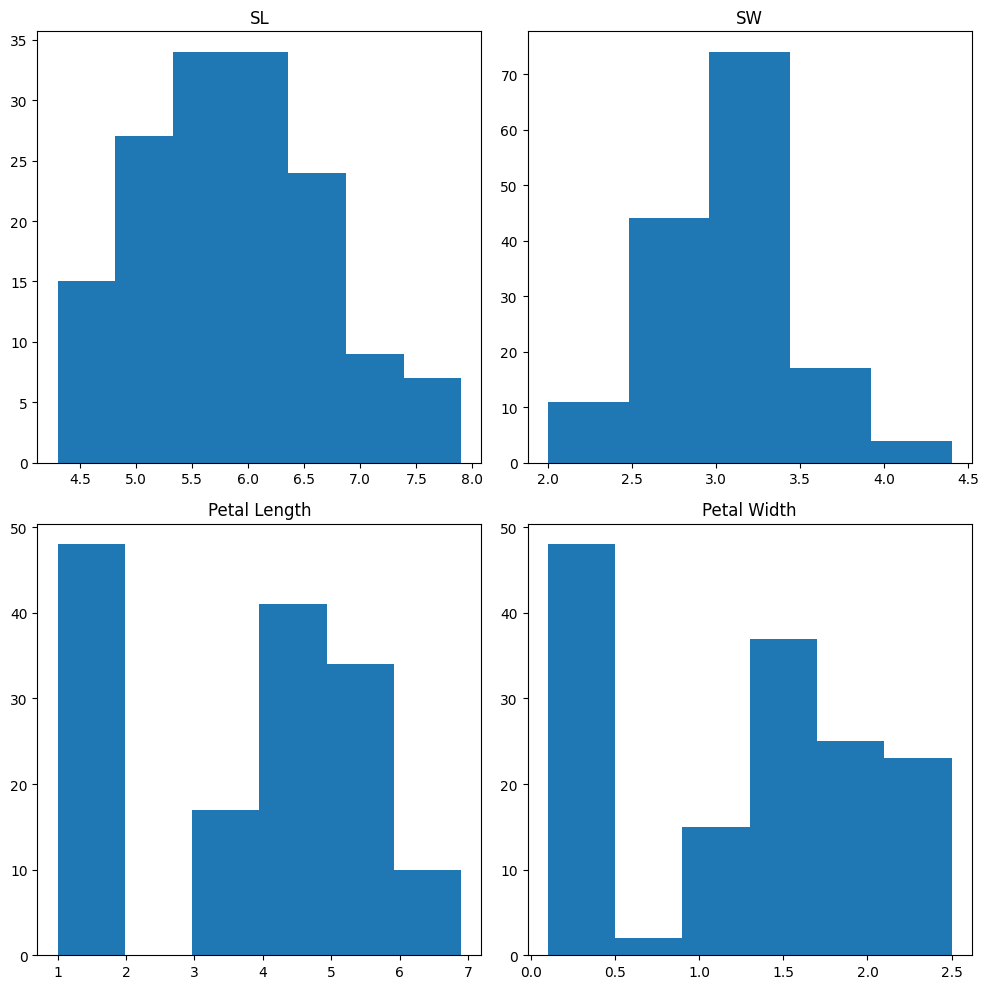

In [391]:


fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].set_title("SL")
axes[0, 0].hist(iris_df['SL'], bins=7)

axes[0, 1].set_title("SW")
axes[0, 1].hist(iris_df['SW'], bins=5)

axes[1, 0].set_title("Petal Length")
axes[1, 0].hist(iris_df['PL'], bins=6)

axes[1, 1].set_title("Petal Width")
axes[1, 1].hist(iris_df['PW'], bins=6)

plt.tight_layout()
plt.show()


Here we are analysing the frequency of each column



Heatmap

To identify correlation between features

<ipython-input-392-9ce53e0246b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris_df.corr(),annot=True)


<Axes: >

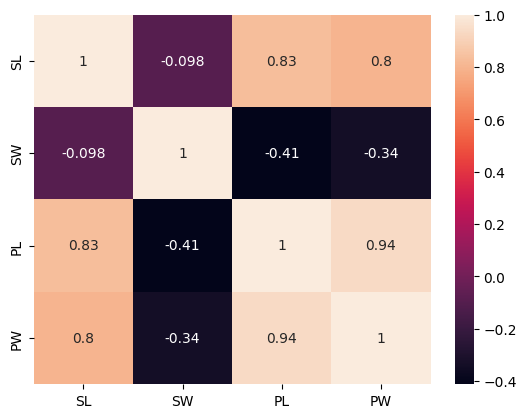

In [392]:
sns.heatmap(iris_df.corr(),annot=True)

PW and PL are highly correlated
PL and SL have good correlation and
PW and SL also in good correlations

DATA PRE-Processing

Separate the Target and Feature Variables

In [393]:
X=iris_df.drop('Classification', axis=1)

In [394]:
y=iris_df['Classification']

Split the Train and Test data as 80:20

In [395]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


Standardise numerical columns

In [396]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Classification Model Support Vector Machines





In [397]:
svc_classifier=SVC()
svc_classifier.fit(X_train,y_train)

SVC()

Make predictions on the test set

In [398]:
svc_predictions=svc_classifier.predict(X_test)

Evaluate the model

Accuracy Score

In [399]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
SVC_accuracy = accuracy_score(y_test, svc_predictions)
print('SVC Accuracy:', SVC_accuracy)

SVC Accuracy: 0.9666666666666667


Classification Report and Confusion Matrix

In [400]:
report = classification_report(y_test, svc_predictions)
print("\nClassification Report:\n", report)
conf_matrix = confusion_matrix(y_test, svc_predictions)
print('\nConfusion Matrix:',conf_matrix)


Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30


Confusion Matrix: [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]




# k-Nearest Neighbor(k-NN)  Classification Model

In [401]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Make predictions on the test set

In [402]:
knn_predictions=knn_classifier.predict(X_test)

Evaluate the model

Accuracy Score

In [403]:
knn_accuracy=accuracy_score(y_test,knn_predictions)
print('\nAccuracyScore KNN:',knn_accuracy)


AccuracyScore KNN: 1.0


Classification Report and Confusion Matrix

In [404]:
knn_classification_report = classification_report(y_test, knn_predictions)
print('Classification Report:\n', knn_classification_report)
knn_confusion_matrix=confusion_matrix(knn_predictions,y_test)
print('\nConfusion Matric:',knn_confusion_matrix)

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matric: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Classification Model :Decision Tree

In [405]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy',max_depth=3)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

Making Prediction on test set

In [406]:
dt_predictions=dt_classifier.predict(X_test)

Evaluate the Model

Accuracy Score

In [407]:
dt_accuracy = accuracy_score(y_test, dt_predictions)
print('Decision Tree Accuracy:', dt_accuracy)

Decision Tree Accuracy: 1.0


Classification and Confusion Matrix

In [408]:
dt_classification_report = classification_report(y_test, dt_predictions)
print('Classification ReportDT:\n', dt_classification_report)

dt_confusion_matrix=confusion_matrix(y_test,dt_predictions)
print('\nConfusion Matrix DT:',dt_confusion_matrix)

Classification ReportDT:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix DT: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Classification Model Random Forest

In [409]:
from sklearn.ensemble import RandomForestClassifier

In [410]:
rf_classifier = RandomForestClassifier(n_estimators=100,random_state=42)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

Making Predictions on Test Dataset

In [411]:
rf_predictions=rf_classifier.predict(X_test)

Evaluate the Model

In [412]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
print('Random Forest Accuracy:', rf_accuracy)

Random Forest Accuracy: 1.0


Classification and Confusion Matrix


In [413]:
rf_classification_report = classification_report(y_test, rf_predictions)
print('Classification Report:\n', rf_classification_report)
rf_confusion=confusion_matrix(y_test,rf_predictions)
print('\nConfusionMatrix:',rf_confusion)


Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


ConfusionMatrix: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Conclusions

To determine which model is best,  considering various factors such as accuracy, precision, recall, and F1-score. Here's a comparison of the Accuracy Score,classification reports and confusion matrices for SVM,Decision Tree, Random Forest, and KNN:

Support Vector Machine

Classification Report:

Precision: Precision is high for Iris-setosa (1.00), indicating that when the model predicts Iris-setosa, it is always correct. Precision is slightly lower for Iris-versicolor (0.89), suggesting that there were some false positives for this class. Precision for Iris-virginica is 0.92.

Recall: Recall is high for Iris-setosa and Iris-virginica (1.00), indicating that the model correctly identified most of the instances of these classes. For Iris-versicolor, recall is 0.89, indicating that the model missed predicting some instances of this class.

F1-Score: The F1-score is high for Iris-setosa and Iris-virginica, indicating a good balance between precision and recall. For Iris-versicolor, the F1-score is slightly lower due to the lower precision and recall.


Accuracy: The overall accuracy of the model is 97%, meaning it correctly predicted the class for 97% of the instances in the test set.

Confusion Matrix :


The confusion matrix shows the number of correct predictions (diagonal elements) and misclassifications. There is one misclassification where Iris-versicolor was predicted as Iris-virginica.
Conclusions:

**Decision Tree, Random Forest, and KNN:**

Classification Report:

Precision: The precision for all classes (Iris-setosa, Iris-versicolor, Iris-virginica) is 1.00, which means that when the models predict a class, they are always correct.

Recall: The recall for all classes is 1.00, indicating that the models correctly identify all instances of each class.

F1-Score: The F1-score, which is the harmonic mean of precision and recall, is 1.00 for all classes, indicating a perfect balance between precision and recall.

Accuracy: The overall accuracy for all three models is 1.00 (100%), meaning they correctly predicted the class for every instance in the test set.

**Confusion Matrix:**

The confusion matrix shows no misclassifications. Each diagonal element represents the number of correct predictions for each class.

Conclusions:


Exceptional Performance: All three models (Decision Tree, Random Forest, and KNN) achieved perfect accuracy (1.00) and demonstrated flawless precision, recall, and F1-score for each class.

No Misclassifications: The confusion matrix confirms that there were no misclassifications. Each model correctly classified all instances in the test set.

Dataset Characteristics: The Iris dataset is relatively small and well-behaved, making it easier for models to achieve perfect performance.


In summary, the SVM model has good overall performance, but there is a slight imbalance in precision and recall for Iris-versicolor, which could be further investigated and addressed.

Decision Tree , KNN and Random Forest are the best models for the IRIS dataset








